In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data_dir = '/content/drive/MyDrive/CCRI/ccri_repo/data'
source_folder = f"{data_dir}/CCRI_results_misc/"


df_P1 = pd.read_csv(os.path.join(source_folder, 'Merged_Exposure_Data.csv'))
df_P2 = pd.read_csv(os.path.join(source_folder, 'P2_Merged_Normalized_avg.csv'))


In [30]:
df_P1.columns

Index(['iso3', 'adm0_name', 'agricultural_drought_absolute',
       'agricultural_drought_relative', 'drought_spi_absolute',
       'drought_spi_relative', 'fire_frequency_absolute',
       'fire_frequency_relative', 'heatwave_duration_absolute',
       'heatwave_duration_relative', 'coastal_flood_absolute',
       'coastal_flood_relative', 'heatwave_frequency_absolute',
       'heatwave_frequency_relative', 'drought_spei_absolute',
       'drought_spei_relative', 'air_pollution_absolute',
       'air_pollution_relative', 'extreme_heat_absolute',
       'extreme_heat_relative', 'fire_FRP_absolute', 'fire_FRP_relative',
       'heatwave_severity_absolute', 'heatwave_severity_relative',
       'sand_dust_absolute', 'sand_dust_relative', 'river_flood_absolute',
       'river_flood_relative', 'vectorborne_malariapf_absolute',
       'vectorborne_malariapf_relative', 'vectorborne_malariapv_absolute',
       'vectorborne_malariapv_relative', 'tropical_storm_absolute',
       'tropical_storm_

In [31]:
df_P2.columns

Index(['iso3', 'P2_Birth_Attendant_Y15T19_value_normalized',
       'P2_Child_poverty_value_normalized',
       'P2_Child_Marriage_value_normalized', 'P2_ED_CR_L2_value_normalized',
       'P2_Immunization_DTP1_value_normalized',
       'P2_Immunization_DTP3_value_normalized', 'P2_LSCED_value_normalized',
       'P2_Learning_Poverty_value_normalized',
       'P2_Nutrition_Stunting_Modeled_value_normalized',
       'P2_Under5_Mortality_value_normalized',
       'P2_Social_Protection_value_normalized', 'P2_PT_Labor_value_normalized',
       'P2_WASH_Sanitation_value_normalized',
       'P2_WASH_Drinking_Water_value_normalized',
       'P2_basic_hygiene_value_normalized',
       'P2_electricity_access_value_normalized',
       'P2_food_poverty_value_normalized', 'P2_arithmetic_avg',
       'rank_reverse'],
      dtype='object')

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Assume df_P1 is already defined

# Group definitions based on prefixes
hazard_groups = {
    'river_flood': ['river_flood'],
    'coastal_flood': ['coastal_flood'],
    'storm': ['tropical_storm'],
    'drought': ['agricultural_drought', 'drought_spei', 'drought_spi'],
    'heat': ['heatwave_frequency', 'heatwave_duration', 'heatwave_severity', 'extreme_heat'],
    #'heat': ['heatwave_frequency', 'extreme_heat'],#version with only frequncy and extreme heat
    'fire': ['fire_FRP', 'fire_frequency'],
    'sand_dust': ['sand_dust'],
    'air_pollution': ['air_pollution'],
    'malaria': ['vectorborne_malariapv', 'vectorborne_malariapf']
}

# Calculate geometric mean for absolute-relative pairs, then normalize
group_mean_columns = []

for group, hazards in hazard_groups.items():
    group_means = []
    for hazard in hazards:
        abs_col = f"{hazard}_absolute"
        rel_col = f"{hazard}_relative"
        mean_col = f"{hazard}_mean"

        df_P1[mean_col] = df_P1[[abs_col, rel_col]].apply(
            lambda row: gmean(row.replace(0, np.nan).dropna()) if len(row.replace(0, np.nan).dropna()) > 0 else np.nan,
            axis=1
        )

        # Min-Max scale to 0-10
        scaler = MinMaxScaler(feature_range=(1, 10))  # scale to 1–10
        df_P1[mean_col] = scaler.fit_transform(df_P1[[mean_col]]).flatten()


        group_means.append(mean_col)

    # Calculate geometric mean within the group
    group_col = f"{group}_gmean"
    df_P1[group_col] = df_P1[group_means].apply(
        lambda row: gmean(row.replace(0, np.nan).dropna()) if len(row.replace(0, np.nan).dropna()) > 0 else np.nan,
        axis=1
    )
    # Min-Max scale to 0-10
    scaler = MinMaxScaler(feature_range=(1, 10))  # scale to 1–10
    df_P1[group_col] = scaler.fit_transform(df_P1[[group_col]]).flatten()


    group_mean_columns.append(group_col)

# Calculate overall geometric mean across groups
df_P1['P1_geometric_avg'] = df_P1[group_mean_columns].apply(
    lambda row: gmean(row.replace(0, np.nan).dropna()) if len(row.replace(0, np.nan).dropna()) > 0 else np.nan,
    axis=1
)

In [33]:
df_P1[group_mean_columns]

,river_flood_gmean,coastal_flood_gmean,storm_gmean,drought_gmean,heat_gmean,fire_gmean,sand_dust_gmean,air_pollution_gmean,malaria_gmean
0,1.000000,1.000000,1.000000,1.000000,2.117180,1.000000,1.000000,3.163200,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.116696,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.897033,3.070214,1.000000,1.000000,5.973424,1.000000
3,1.000000,1.450150,1.000000,1.925489,5.107222,2.446950,3.174719,6.735627,1.000000
4,1.000000,1.000000,1.000000,1.693808,3.151446,2.213870,1.693327,4.676207,1.000000
...,...,...,...,...,...,...,...,...,...
190,5.125869,2.114887,1.000000,7.482654,6.011544,5.460717,2.786999,9.138690,1.145390
191,3.081215,1.000000,1.000000,6.288774,6.806840,5.071652,4.512122,8.923453,3.873393
192,3.081670,1.758452,1.000000,6.760704,2.853797,5.785319,3.369484,8.850106,1.000000
193,3.850901,3.242061,7.184284,6.627566,8.015037,4.164849,3.209971,9.805371,1.000000


In [34]:
p1_group_mean = pd.concat([df_P1[['iso3','adm0_name'] + group_mean_columns]], axis=1)
p1_group_mean.to_csv(os.path.join(source_folder, "p1_group_mean.csv"), index=False)

In [35]:
df_P1['P1_geometric_avg']

,P1_geometric_avg
0,1.235279
1,1.012339
2,1.483454
3,2.085476
4,1.655838
...,...
190,3.494370
191,3.610761
192,2.971036
193,4.405088


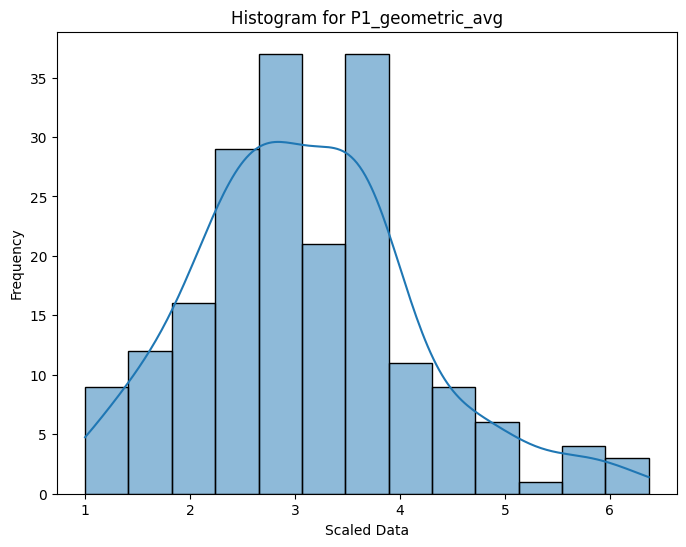

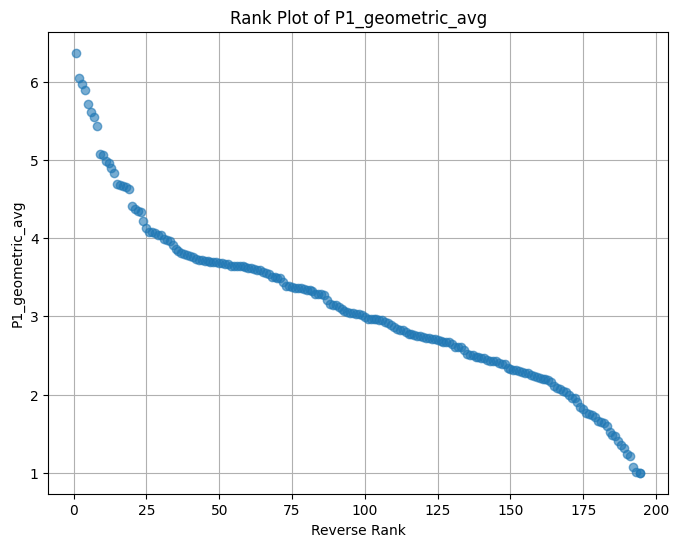

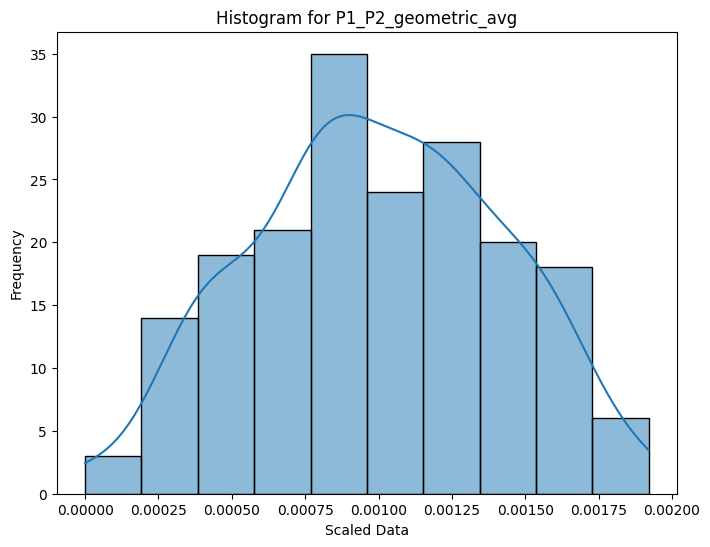

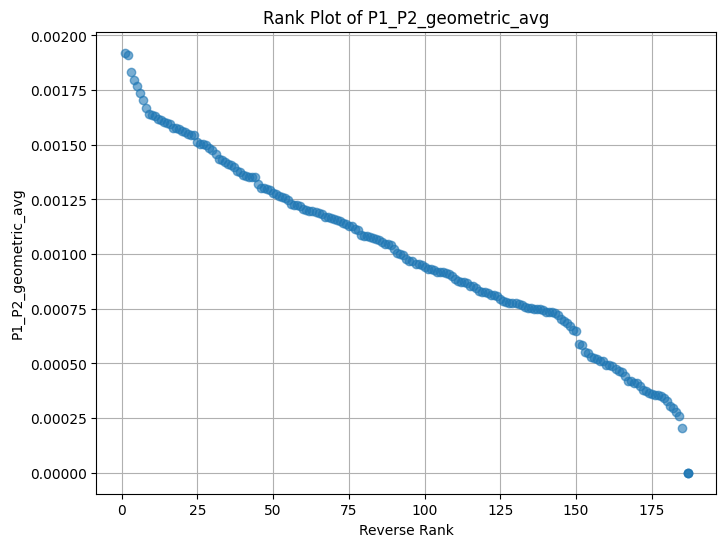

    iso3  P1_geometric_avg  P2_arithmetic_avg  P1_P2_geometric_avg
0    AFG          5.709203           7.252646             8.359968
1    AGO          5.651552           7.233329             8.324330
2    ALB          3.388634           1.625885             4.267945
3    AND          1.114794           2.456273             3.380683
4    ARE          4.402700           2.895949             5.645260
..   ...               ...                ...                  ...
190  WSM          1.774683           2.814786             4.130818
191  YEM          6.234647           6.275019             8.203319
192  ZAF          5.729888           2.981898             6.223867
193  ZMB          4.103092           6.102685             7.069543
194  ZWE          4.969623           5.668691             7.352743

[195 rows x 4 columns]


In [36]:

# Plot histogram and normality check
plt.figure(figsize=(8, 6))
sns.histplot(df_P1['P1_geometric_avg'], kde=True)
plt.title(f"Histogram for P1_geometric_avg")
plt.xlabel("Scaled Data")
plt.ylabel("Frequency")
plt.show()

# Compute ranks in reverse order
df_P1['rank_reverse'] = df_P1['P1_geometric_avg'].rank(method='average', ascending=False)
plt.figure(figsize=(8, 6))
plt.plot(df_P1['rank_reverse'], df_P1['P1_geometric_avg'], marker='o', linestyle='', alpha=0.6)
plt.xlabel("Reverse Rank")
plt.ylabel("P1_geometric_avg")
plt.title(f"Rank Plot of P1_geometric_avg")
plt.grid(True)
plt.show()


# Apply Min-Max scaling to 'P1_geometric_avg' based on the plot
# q5 = df_P1['P1_geometric_avg'].quantile(0.05)
# q95 = df_P1['P1_geometric_avg'].quantile(0.95)
# df_P1['P1_geometric_avg'] = np.clip(df_P1['P1_geometric_avg'], q5, q95)

# Scale the 'P1_geometric_avg' column to range from 0 to 10
scaler = MinMaxScaler(feature_range=(0, 10))  # scale to 0–10
df_P1['P1_geometric_avg'] = scaler.fit_transform(df_P1[['P1_geometric_avg']]).flatten()


# Step 3: Group by 'ISO3' and calculate the average of 'P1_geometric_avg' for each 'ISO3'
df_P1_grouped = df_P1.groupby('iso3', as_index=False)['P1_geometric_avg'].mean()

# Step 4: Merge df_P1_grouped with df_P2 on 'ISO3'
merged_df = df_P1_grouped.merge(df_P2[['iso3', 'P2_arithmetic_avg']], left_on='iso3', right_on='iso3', how='left')

# Step 5: Calculate the Geometric Mean between 'P1_geometric_avg' and 'P2_arithmetic_avg'
merged_df['P1_P2_geometric_avg'] = merged_df.apply(
    lambda row: gmean([row['P1_geometric_avg'], row['P2_arithmetic_avg']] + [1e-10])
    if not np.isnan(row['P1_geometric_avg']) and not np.isnan(row['P2_arithmetic_avg']) else np.nan, axis=1
)

# Plot histogram and normality check
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['P1_P2_geometric_avg'], kde=True)
plt.title(f"Histogram for P1_P2_geometric_avg")
plt.xlabel("Scaled Data")
plt.ylabel("Frequency")
plt.show()

# Compute ranks in reverse order
merged_df['rank_reverse'] = merged_df['P1_P2_geometric_avg'].rank(method='average', ascending=False)
plt.figure(figsize=(8, 6))
plt.plot(merged_df['rank_reverse'], merged_df['P1_P2_geometric_avg'], marker='o', linestyle='', alpha=0.6)
plt.xlabel("Reverse Rank")
plt.ylabel("P1_P2_geometric_avg")
plt.title(f"Rank Plot of P1_P2_geometric_avg")
plt.grid(True)
plt.show()

#final clip and normalization!!!
# q5 = merged_df['P1_P2_geometric_avg'].quantile(0.05)
# q95 = merged_df['P1_P2_geometric_avg'].quantile(0.95)
# merged_df['P1_P2_geometric_avg'] = np.clip(merged_df['P1_P2_geometric_avg'], q5, q95)

# Scale the 'P1_p2_geometric_avg' column to range from 0 to 10
scaler = MinMaxScaler(feature_range=(0, 10))  # scale to 0–10
merged_df['P1_P2_geometric_avg'] = scaler.fit_transform(merged_df[['P1_P2_geometric_avg']]).flatten()


# Now 'merged_df' contains the scaled 'P1_p2_geometric_avg_scaled'
print(merged_df[['iso3', 'P1_geometric_avg', 'P2_arithmetic_avg', 'P1_P2_geometric_avg']])


In [37]:
merged_df.to_csv(os.path.join(source_folder,'p1_p2_avg_ccri.csv'), index=False)

In [38]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file as a GeoDataFrame
geo_df = gpd.read_file(os.path.join(source_folder,'child_pop_sum_adm0_geojson.geojson'))


In [39]:
geo_df.drop(columns=['child_population', 'child_population_gpw'], inplace=True)

In [40]:
geo_df

,ISO3,name,geometry
0,ATA,Antarctica,"MULTIPOLYGON (((163.26324 -70.40591, 163.33018..."
1,AIA,Anguilla,"POLYGON ((-63.173 18.16017, -63.133 18.17264, ..."
2,ESH,Western Sahara,"POLYGON ((-17.10318 20.84348, -17.07673 20.808..."
3,PYF,French Polynesia,"MULTIPOLYGON (((-151.04006 -16.77436, -150.990..."
4,PYF,Clipperton Island,"POLYGON ((-109.23329 10.29671, -109.19932 10.2..."
...,...,...,...
284,UMI,Palmyra Atoll,"POLYGON ((-162.09518 5.87492, -162.06004 5.870..."
285,UMI,Navassa Island,"POLYGON ((-75.02862 18.41279, -75.00506 18.391..."
286,MNP,Northern Mariana Is. (USA),"MULTIPOLYGON (((145.64827 16.33114, 145.72384 ..."
287,PRI,Puerto Rico (USA),"MULTIPOLYGON (((-67.94541 18.08267, -67.88218 ..."


In [41]:
import glob
import os

data_dir = '/content/drive/MyDrive/CCRI/ccri_repo/data'
exposure_dir = f"{data_dir}/p1_exposure/"

exposure_file =  glob.glob(os.path.join(exposure_dir, '*.csv'))[0]
exposure_df = pd.read_csv(exposure_file)
exposure_df = exposure_df.groupby('iso3', as_index=False)[['child_population_exposed','child_population_total','population_total']].sum()
geo_df = geo_df.merge(exposure_df[['iso3','child_population_total','population_total']], left_on='ISO3', right_on='iso3', how='left')


In [42]:
geo_df.drop(columns=['iso3'], inplace=True)

In [43]:
geo_df.columns

Index(['ISO3', 'name', 'geometry', 'child_population_total',
       'population_total'],
      dtype='object')

In [44]:

# Ensure the key for merging is consistent (e.g., 'ISO3' in df_P1 and 'iso3' in df_P2)
# Merge with merged_df (use 'ISO3' from merged_df and 'iso3' from geo_df or merged_df as needed)

merged_geo_df = geo_df.merge(merged_df, left_on='ISO3', right_on='iso3', how='left')

if 'name' in df_P1.columns:
    df_P1 = df_P1.drop(columns=['name'])

# Ensure only numeric columns are included in the aggregation
numeric_cols = df_P1.select_dtypes(include=[np.number]).columns
df_P1 = df_P1.groupby('iso3', as_index=False)[numeric_cols].mean()


merged_geo_df = merged_geo_df.merge(df_P1, left_on='ISO3', right_on='iso3', how='left')
merged_geo_df = merged_geo_df.merge(df_P2, left_on='ISO3', right_on='iso3', how='left')


# Save the merged GeoDataFrame as a new GeoJSON file
output_geojson = os.path.join(source_folder,'p1_p2_avg_ccri.geojson')
merged_geo_df.to_file(output_geojson, driver='GeoJSON')

print(f"Merged GeoDataFrame saved to {output_geojson}")

Merged GeoDataFrame saved to /content/drive/MyDrive/CCRI/ccri_repo/data/CCRI_results_misc/p1_p2_avg_ccri.geojson


In [45]:
geo_df

,ISO3,name,geometry,child_population_total,population_total
0,ATA,Antarctica,"MULTIPOLYGON (((163.26324 -70.40591, 163.33018...",0.000000e+00,0.000000e+00
1,AIA,Anguilla,"POLYGON ((-63.173 18.16017, -63.133 18.17264, ...",3.104925e+03,1.303780e+04
2,ESH,Western Sahara,"POLYGON ((-17.10318 20.84348, -17.07673 20.808...",1.489338e+05,5.475158e+05
3,PYF,French Polynesia,"MULTIPOLYGON (((-151.04006 -16.77436, -150.990...",5.952213e+04,2.344014e+05
4,PYF,Clipperton Island,"POLYGON ((-109.23329 10.29671, -109.19932 10.2...",5.952213e+04,2.344014e+05
...,...,...,...,...,...
284,UMI,Palmyra Atoll,"POLYGON ((-162.09518 5.87492, -162.06004 5.870...",0.000000e+00,0.000000e+00
285,UMI,Navassa Island,"POLYGON ((-75.02862 18.41279, -75.00506 18.391...",0.000000e+00,0.000000e+00
286,MNP,Northern Mariana Is. (USA),"MULTIPOLYGON (((145.64827 16.33114, 145.72384 ...",1.074228e+04,3.738986e+04
287,PRI,Puerto Rico (USA),"MULTIPOLYGON (((-67.94541 18.08267, -67.88218 ...",4.977387e+05,3.208541e+06


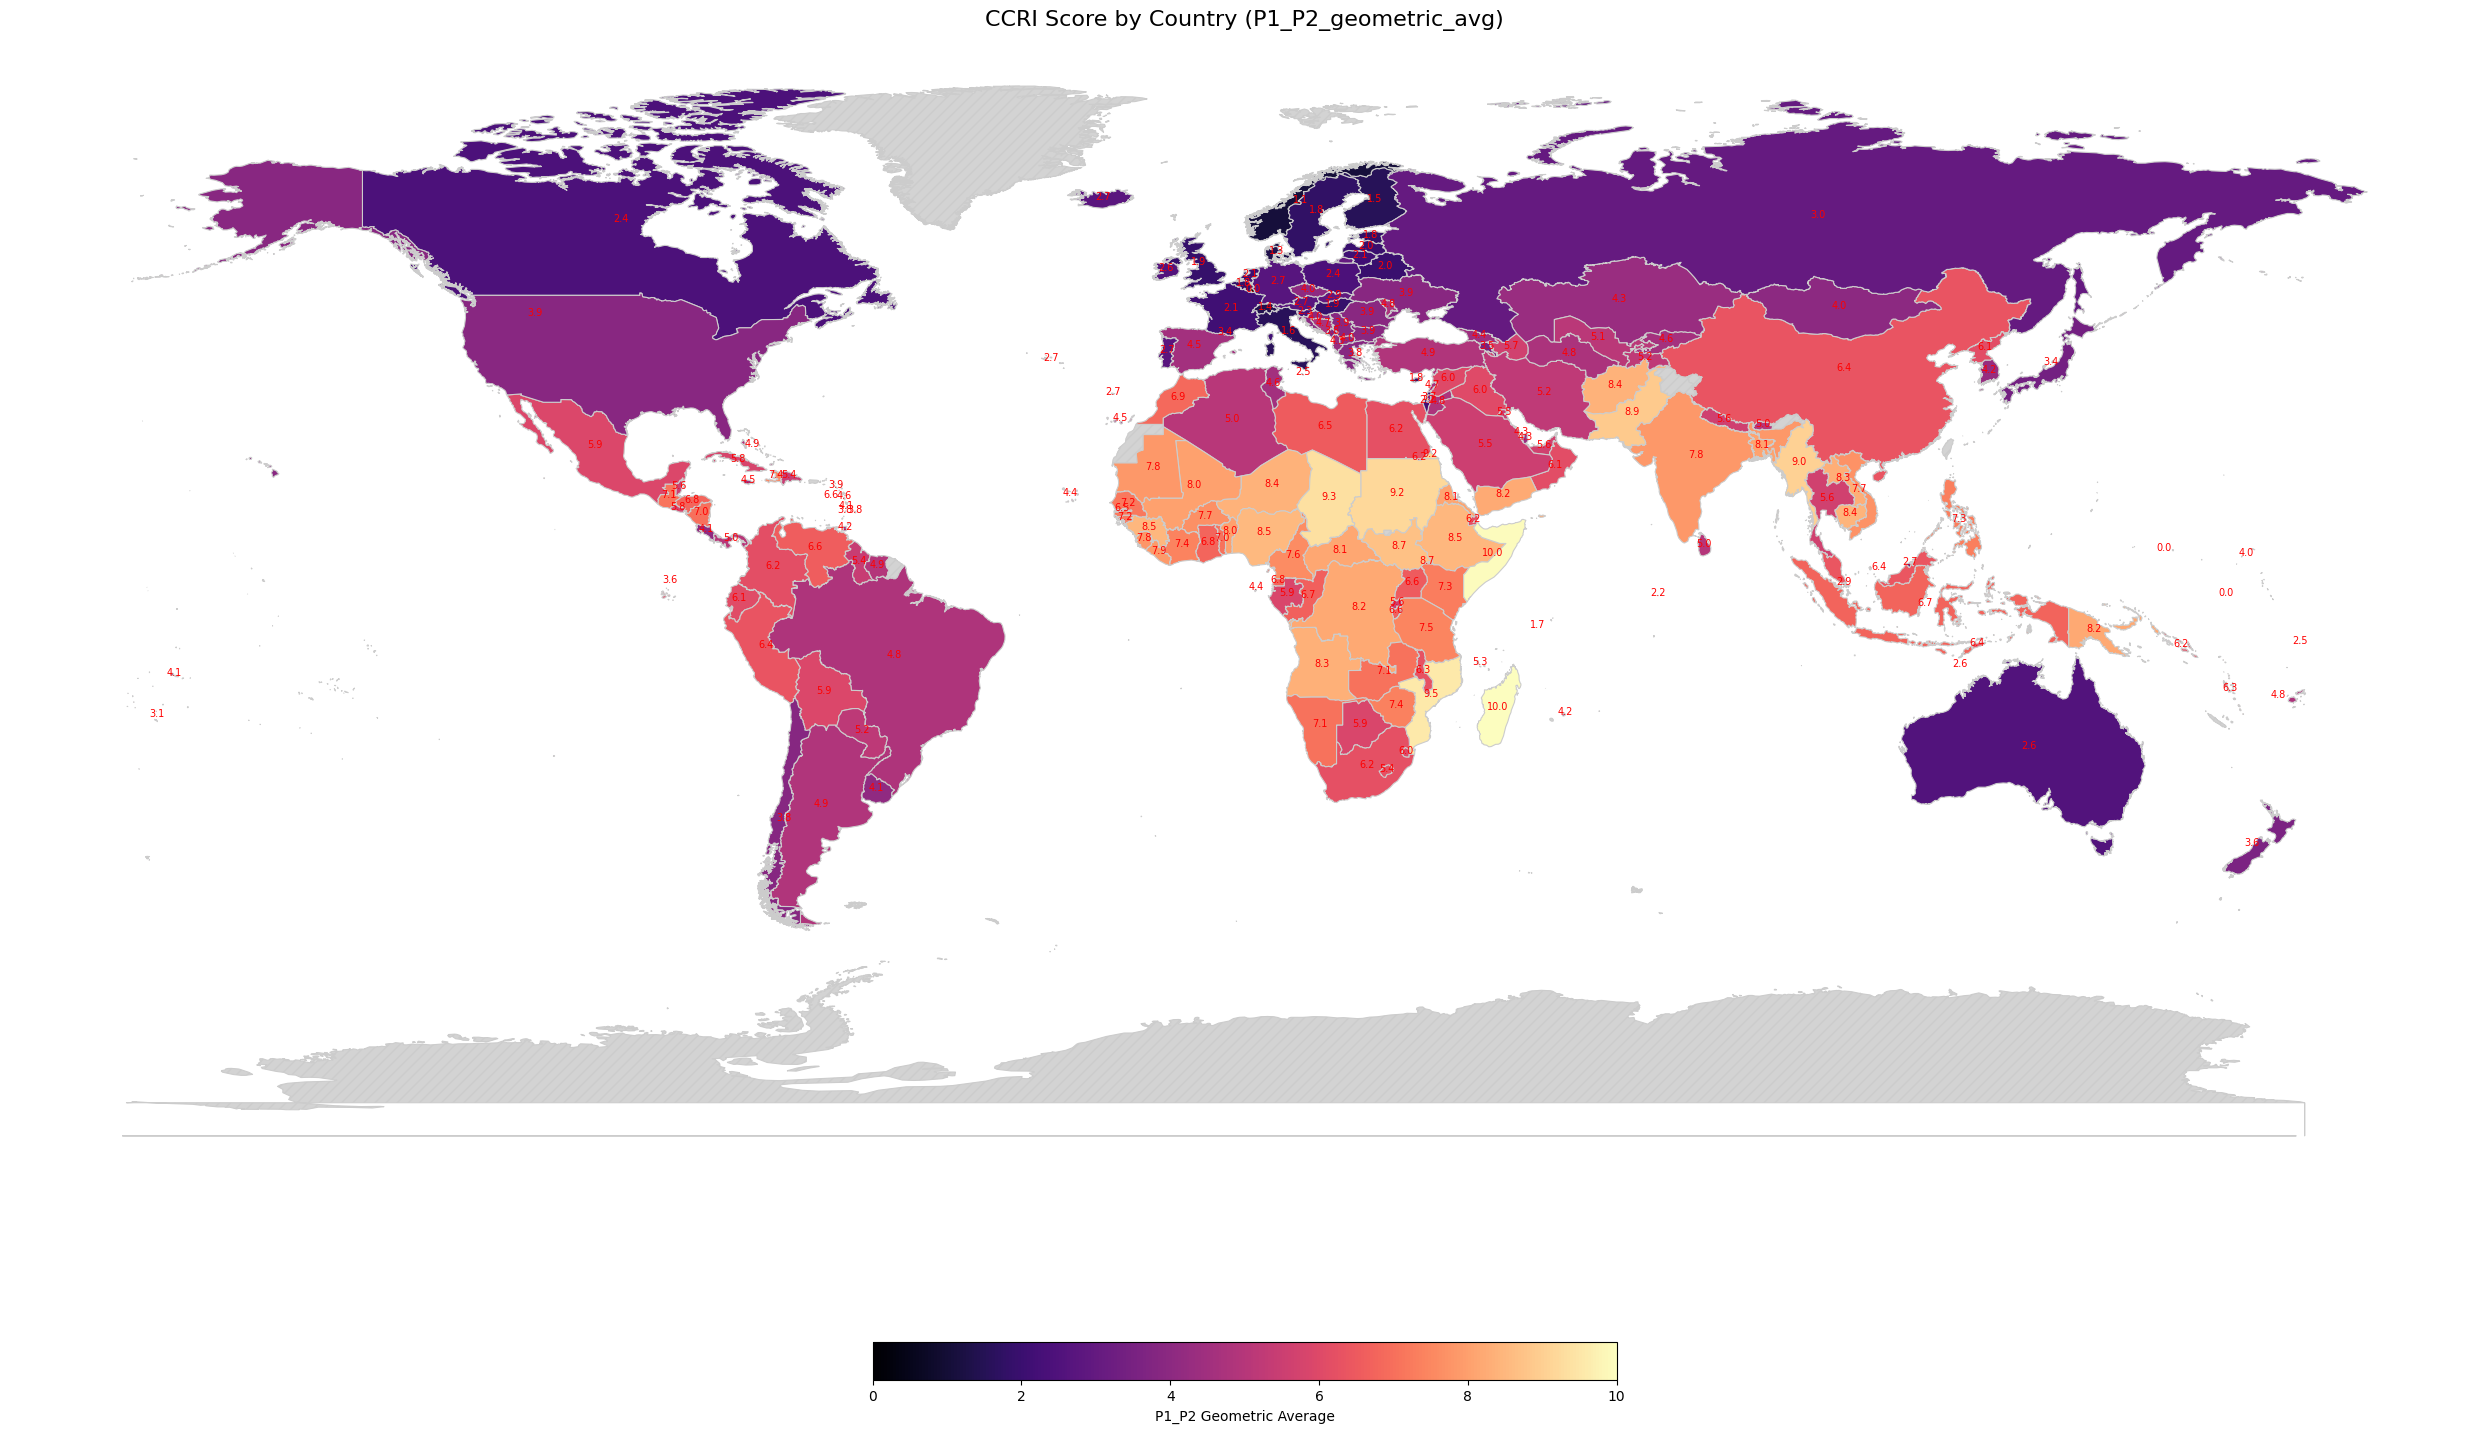

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd  # Just to be safe in case pd is not imported

fig, ax = plt.subplots(1, 1, figsize=(32, 20))
merged_geo_df.plot(
    column='P1_P2_geometric_avg',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'shrink': 0.3,      # Reduce legend size
        'label': "P1_P2 Geometric Average",
        'orientation': "horizontal",
        'pad': 0.1
    },
    missing_kwds={
        'color': 'lightgray',       # Fill color for NaN
        'edgecolor': '0.8',         # Edge color for NaN polygons
        'hatch': '///',             # Optional: add pattern to differentiate
        'label': 'No data'
    }
)

# Add labels to non-NaN values
for idx, row in merged_geo_df.iterrows():
    if pd.notnull(row['P1_P2_geometric_avg']):
        centroid = row['geometry'].centroid
        ax.annotate(text=f"{row['P1_P2_geometric_avg']:.1f}", xy=(centroid.x, centroid.y),
                    horizontalalignment='center', fontsize=7, color='red')

# Add title and remove axis
plt.title('CCRI Score by Country (P1_P2_geometric_avg)', fontsize=16)
plt.axis('off')

# Optional: manually add legend entry for NaN
# ax.legend(handles=[Patch(facecolor='lightgray', label='No data')])

plt.show()


In [47]:
np.nanmean(merged_geo_df['P1_P2_geometric_avg'])

np.float64(5.1795895090192445)

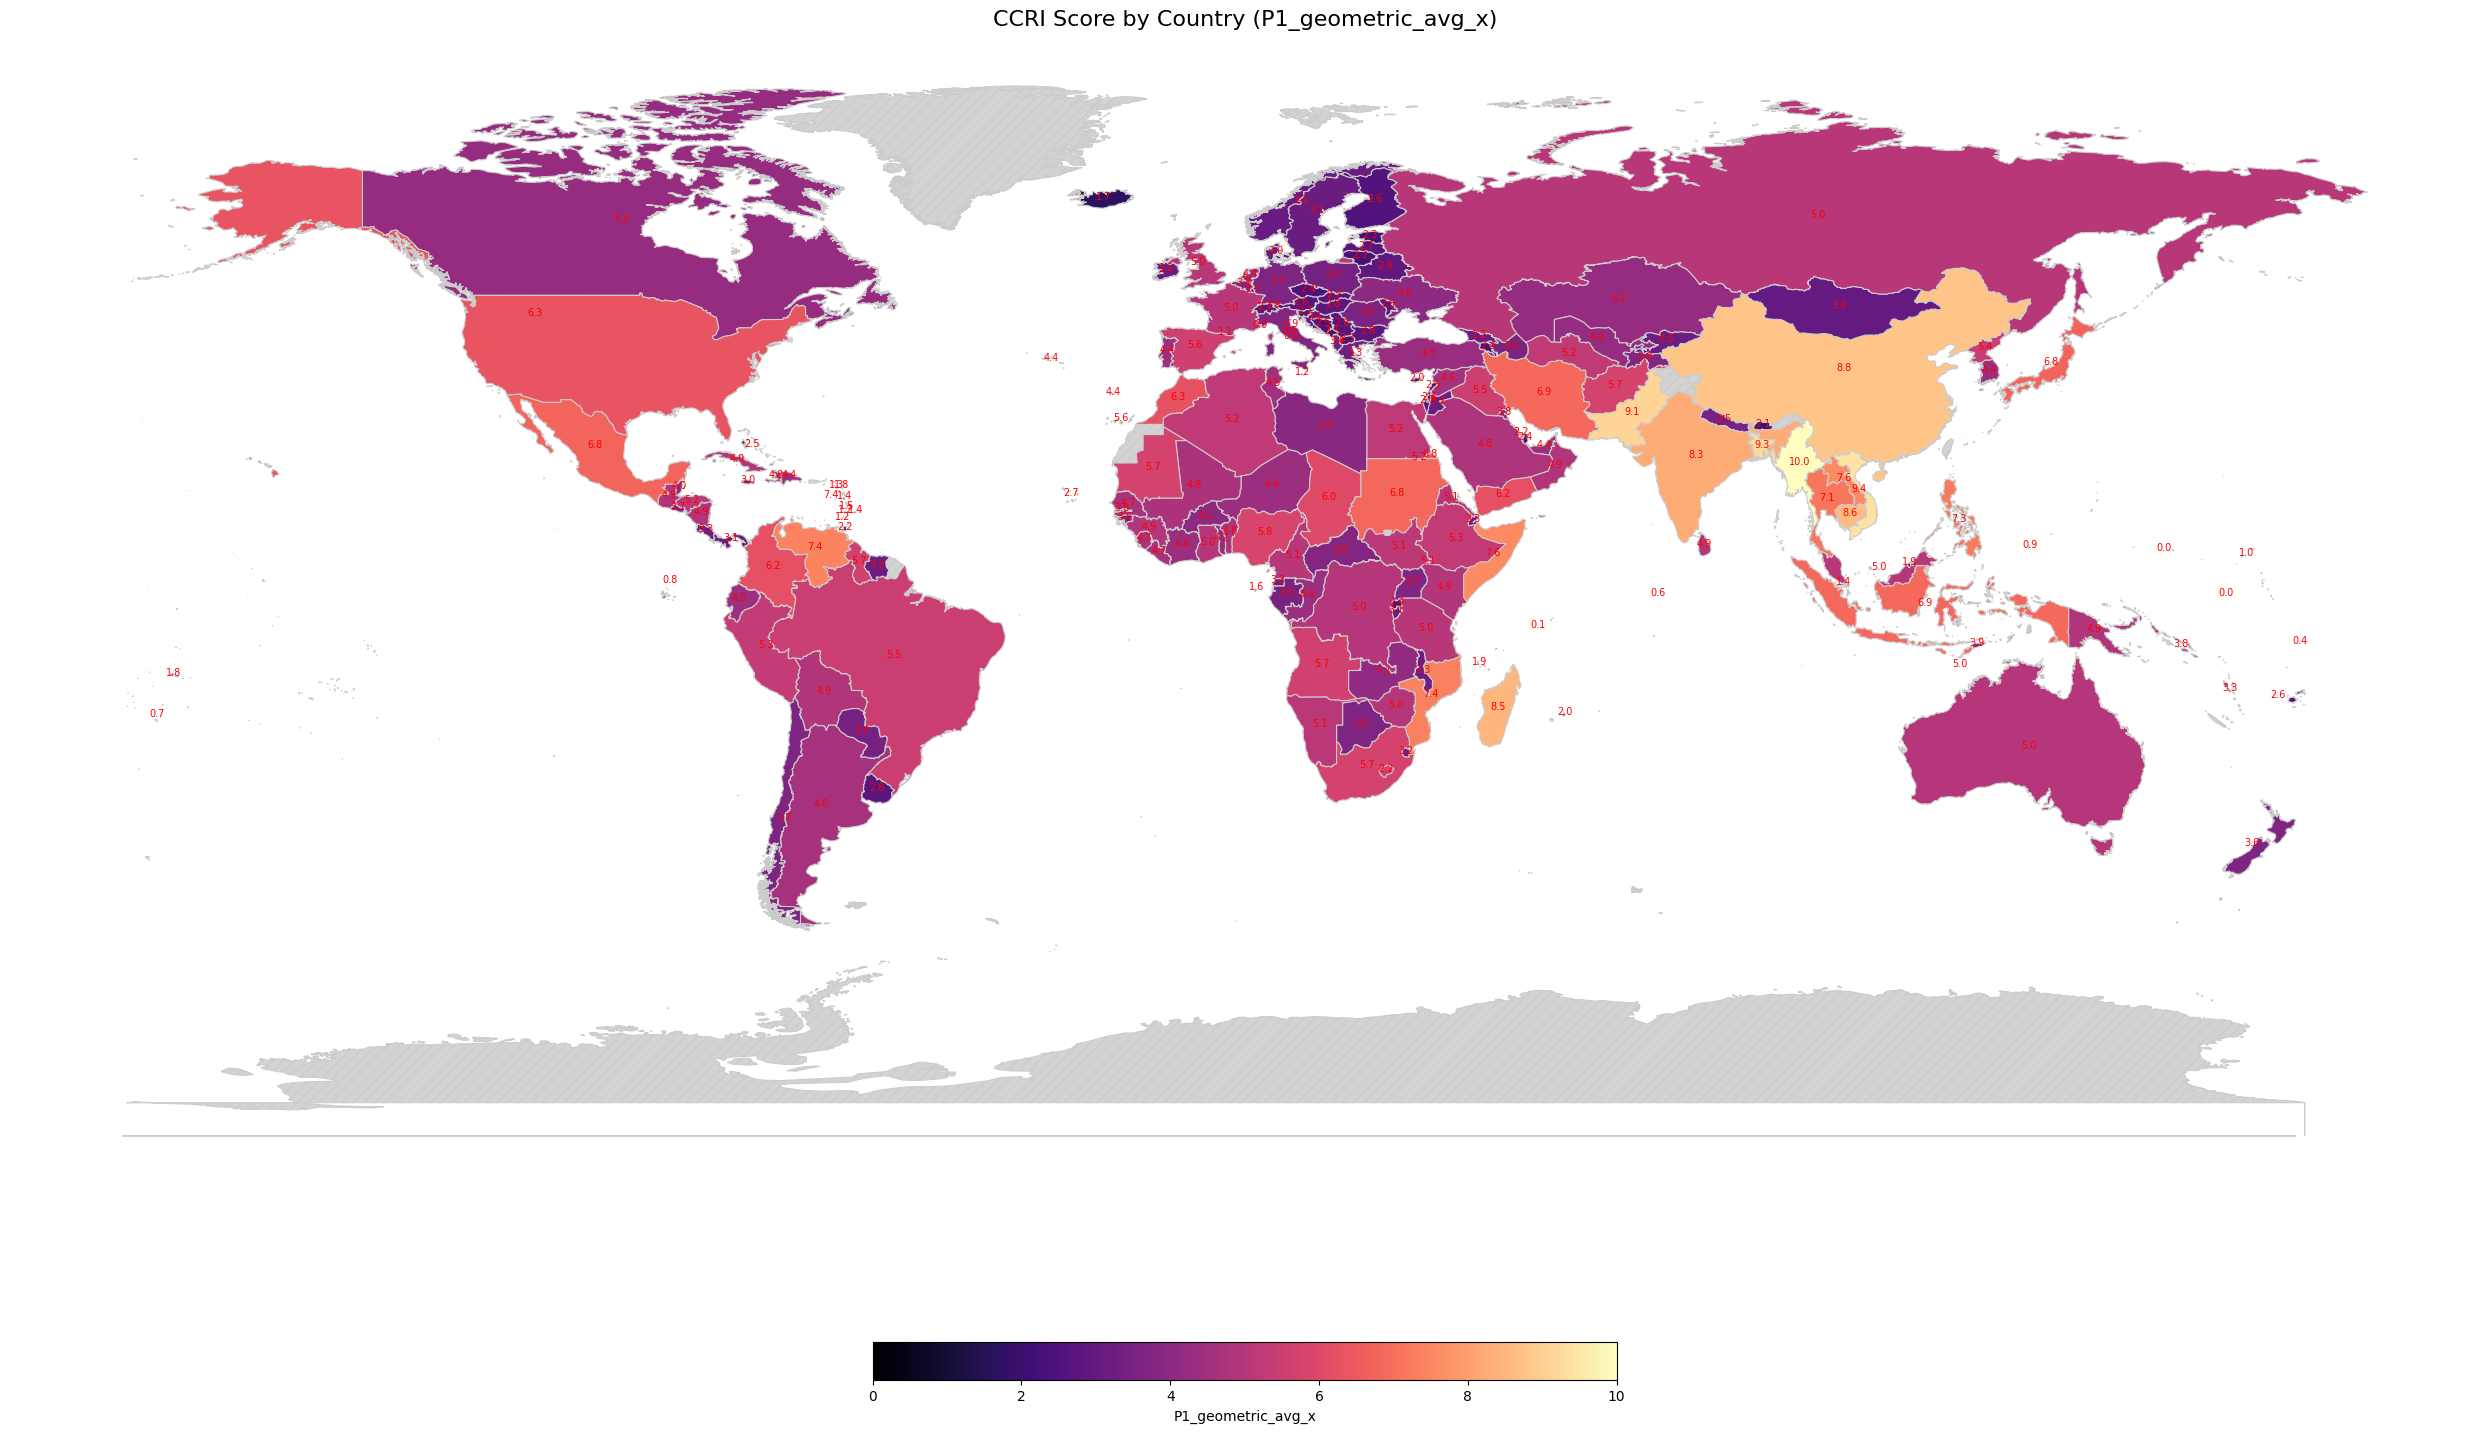

In [48]:
# Attempt to read and plot assuming the file now exists and has 'P1_P2_geometric_avg' column
import geopandas as gpd
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots(1, 1, figsize=(32, 20))
merged_geo_df.plot(
    column='P1_geometric_avg_x',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'shrink': 0.3,      # Reduce legend size
        'label': "P1_geometric_avg_x",
        'orientation': "horizontal",
        'pad': 0.1
    },
    missing_kwds={
        'color': 'lightgray',       # Fill color for NaN
        'edgecolor': '0.8',         # Edge color for NaN polygons
        'hatch': '///',             # Optional: add pattern to differentiate
        'label': 'No data'
    }
)

# Add labels
for idx, row in merged_geo_df.iterrows():
    if pd.notnull(row['P1_geometric_avg_x']):
        centroid = row['geometry'].centroid
        ax.annotate(text=f"{row['P1_geometric_avg_x']:.1f}", xy=(centroid.x, centroid.y),
                    horizontalalignment='center', fontsize=7, color='red')

plt.title('CCRI Score by Country (P1_geometric_avg_x)', fontsize=16)
plt.axis('off')
plt.show()



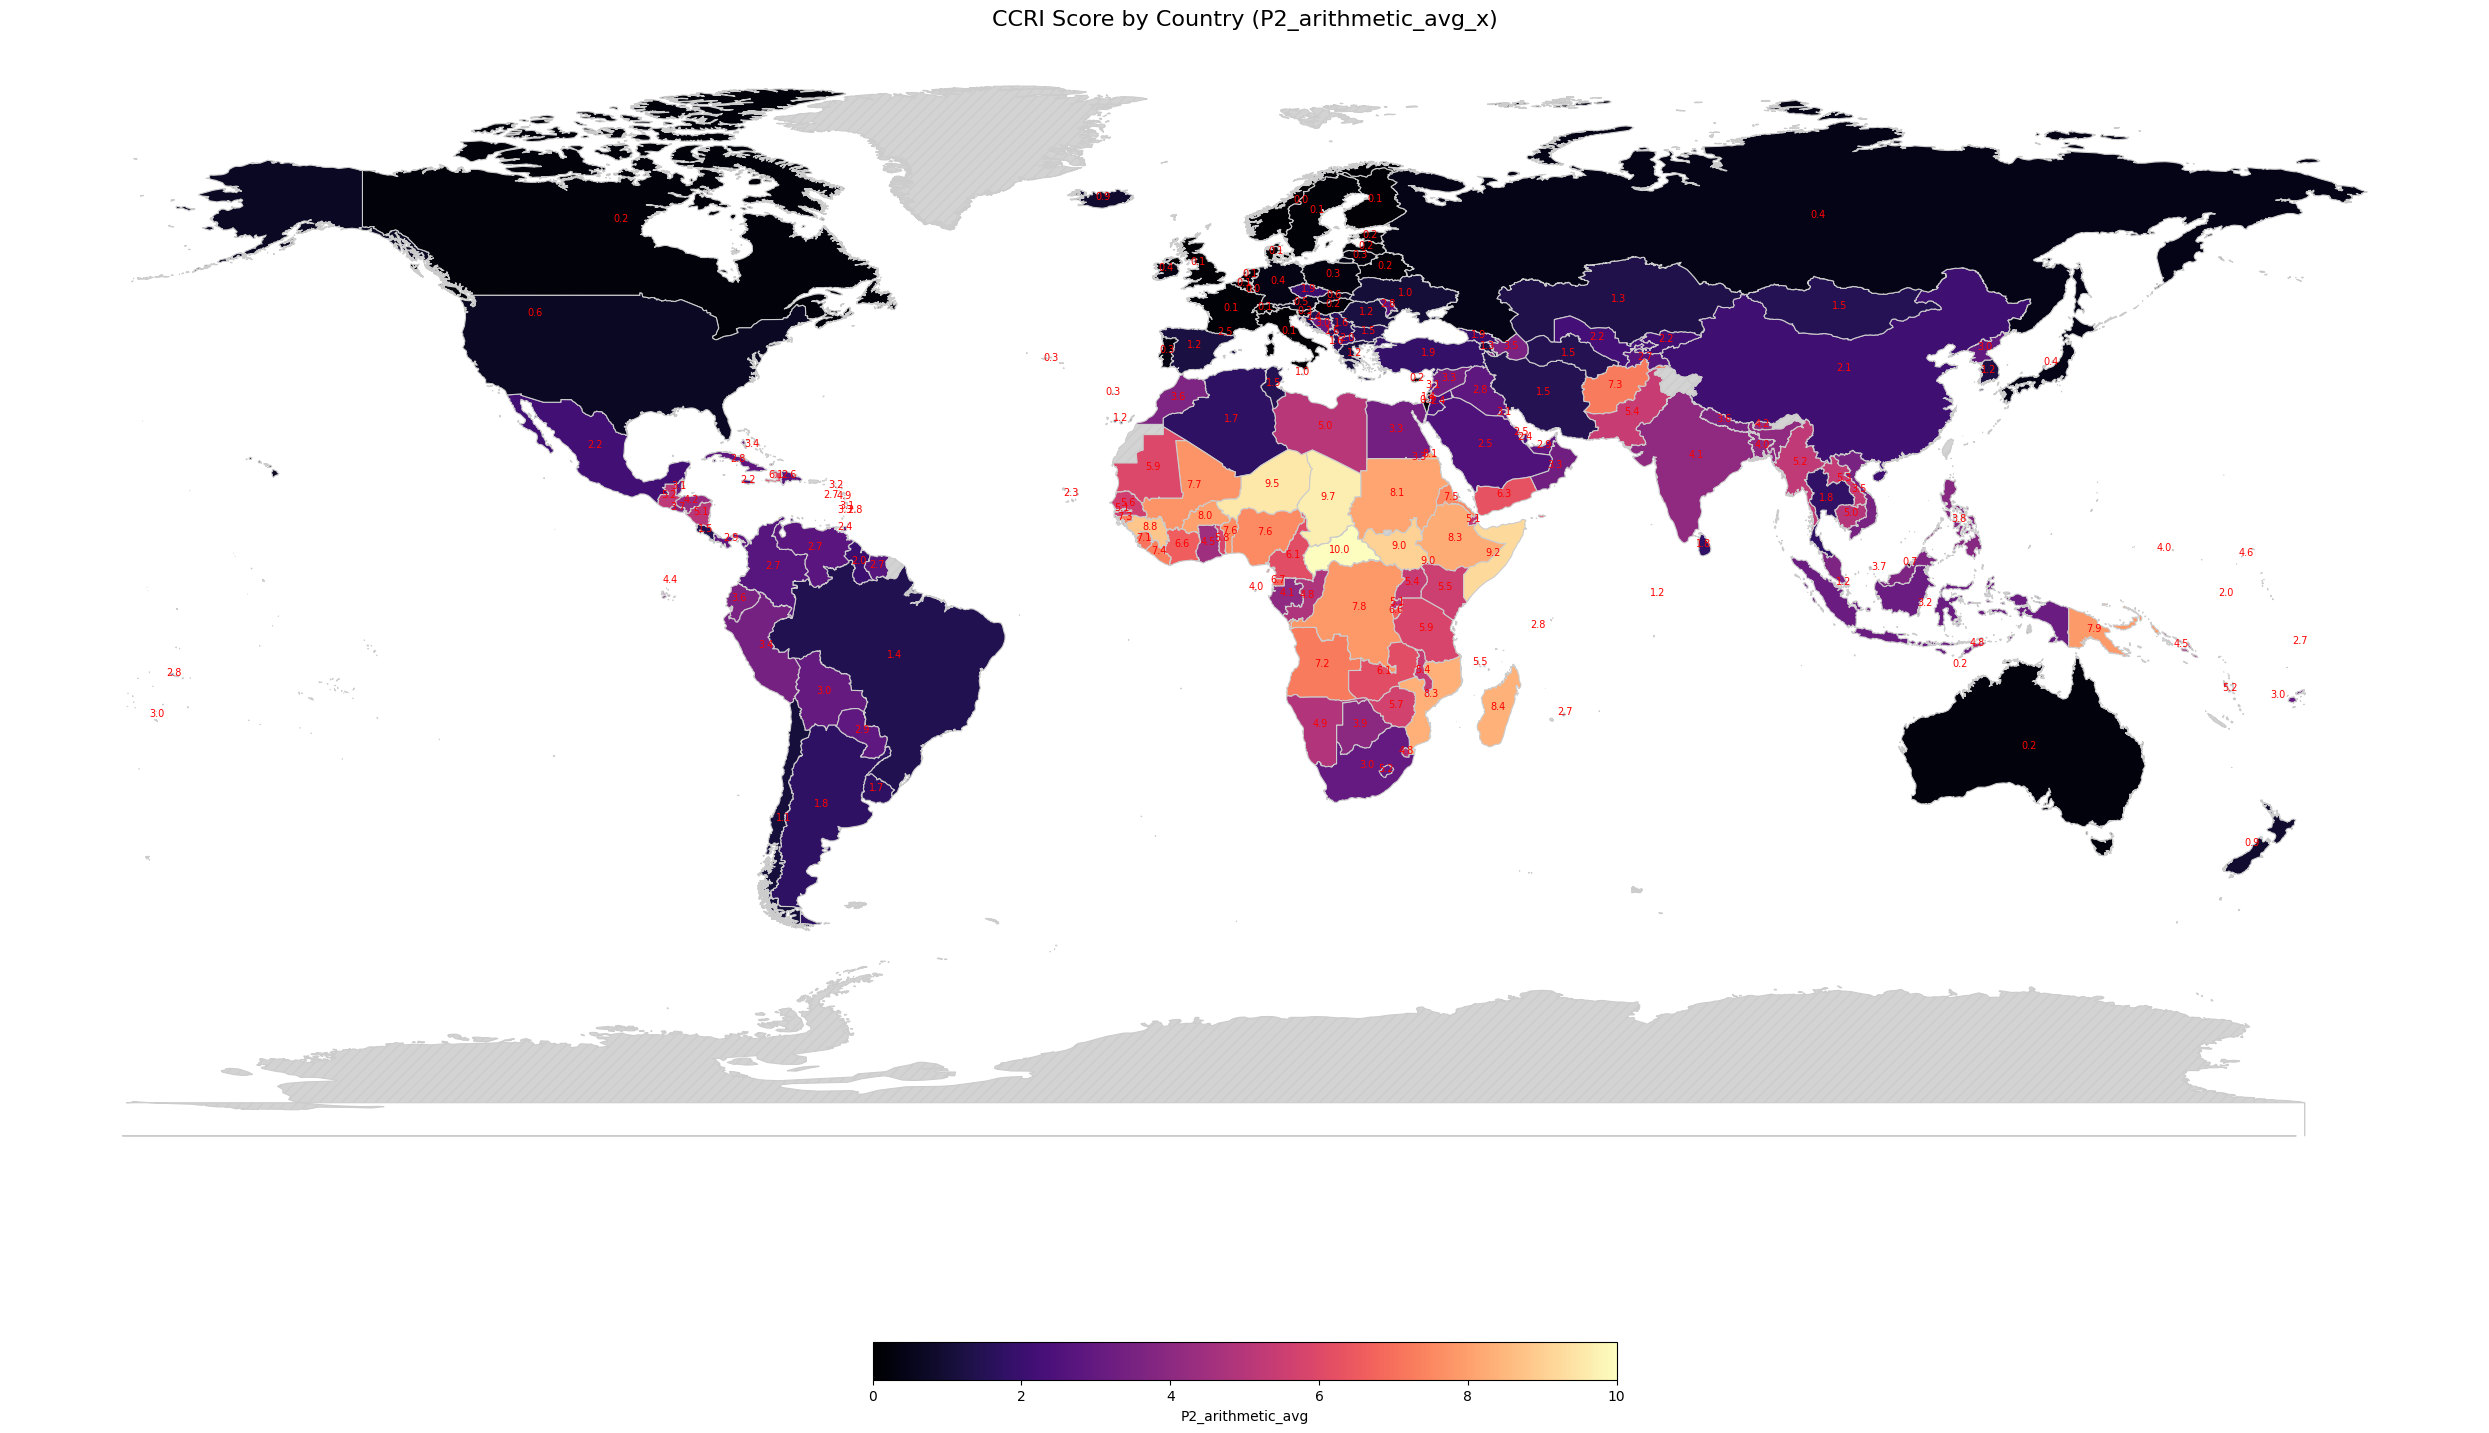

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

fig, ax = plt.subplots(1, 1, figsize=(32, 20))
merged_geo_df.plot(
    column='P2_arithmetic_avg_x',
    cmap='magma',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'shrink': 0.3,
        'label': "P2_arithmetic_avg",
        'orientation': "horizontal",
        'pad': 0.1
    },
    missing_kwds={
        'color': 'lightgray',      # Fill color for NaN
        'edgecolor': '0.8',
        'hatch': '///',            # Optional pattern
        'label': 'No data'
    }
)

# Add labels for valid values
for idx, row in merged_geo_df.iterrows():
    if pd.notnull(row['P2_arithmetic_avg_x']):
        centroid = row['geometry'].centroid
        ax.annotate(
            text=f"{row['P2_arithmetic_avg_x']:.1f}",
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=7,
            color='red'
        )

plt.title('CCRI Score by Country (P2_arithmetic_avg_x)', fontsize=16)
plt.axis('off')
plt.show()
